# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [53]:
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.lr=learning_rate
        self.epochs=epochs
        self.penalty = penalty
        self.alpha =  alpha
    
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))
    
        # gradient descent
        if self.penalty == None :
            for i in range(self.epochs):
                delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
                dw= np.dot(X_train.T,delta) 
                db= np.sum(delta).reshape(1,1)

                #update weights and biases
                self.weights-= self.lr * dw
                self.bias-= self.lr* db
                
        elif self.penalty == 'L1' :
            for i in range(self.epochs):
                delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
                dw= np.dot(X_train.T,delta) + np.sign(self.weights)*self.alpha
                db= np.sum(delta).reshape(1,1)

                #update weights and biases
                self.weights-= self.lr * dw
                self.bias-= self.lr* db
        else :
            for i in range(self.epochs):
                delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
                dw= np.dot(X_train.T,delta) + 2*(self.weights)*self.alpha
                db= np.sum(delta).reshape(1,1)

                #update weights and biases
                self.weights-= self.lr * dw
                self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted


# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

for linear model :
[[ 7.92233287]
 [ 4.31336919]
 [ 0.16290823]
 [ 9.60882167]
 [ 8.794827  ]
 [12.04450328]] [[16.3445387]]
for lasso model
[[4.87711832e+00]
 [6.28951699e-01]
 [7.06553676e-03]
 [6.15812845e+00]
 [5.22234154e+00]
 [9.41623123e+00]] [[21.26580161]]
for ridge model :
[[ 0.63197399]
 [ 0.31966489]
 [-0.09539278]
 [ 0.84220079]
 [ 0.68340396]
 [ 0.91586556]] [[30.78879215]]


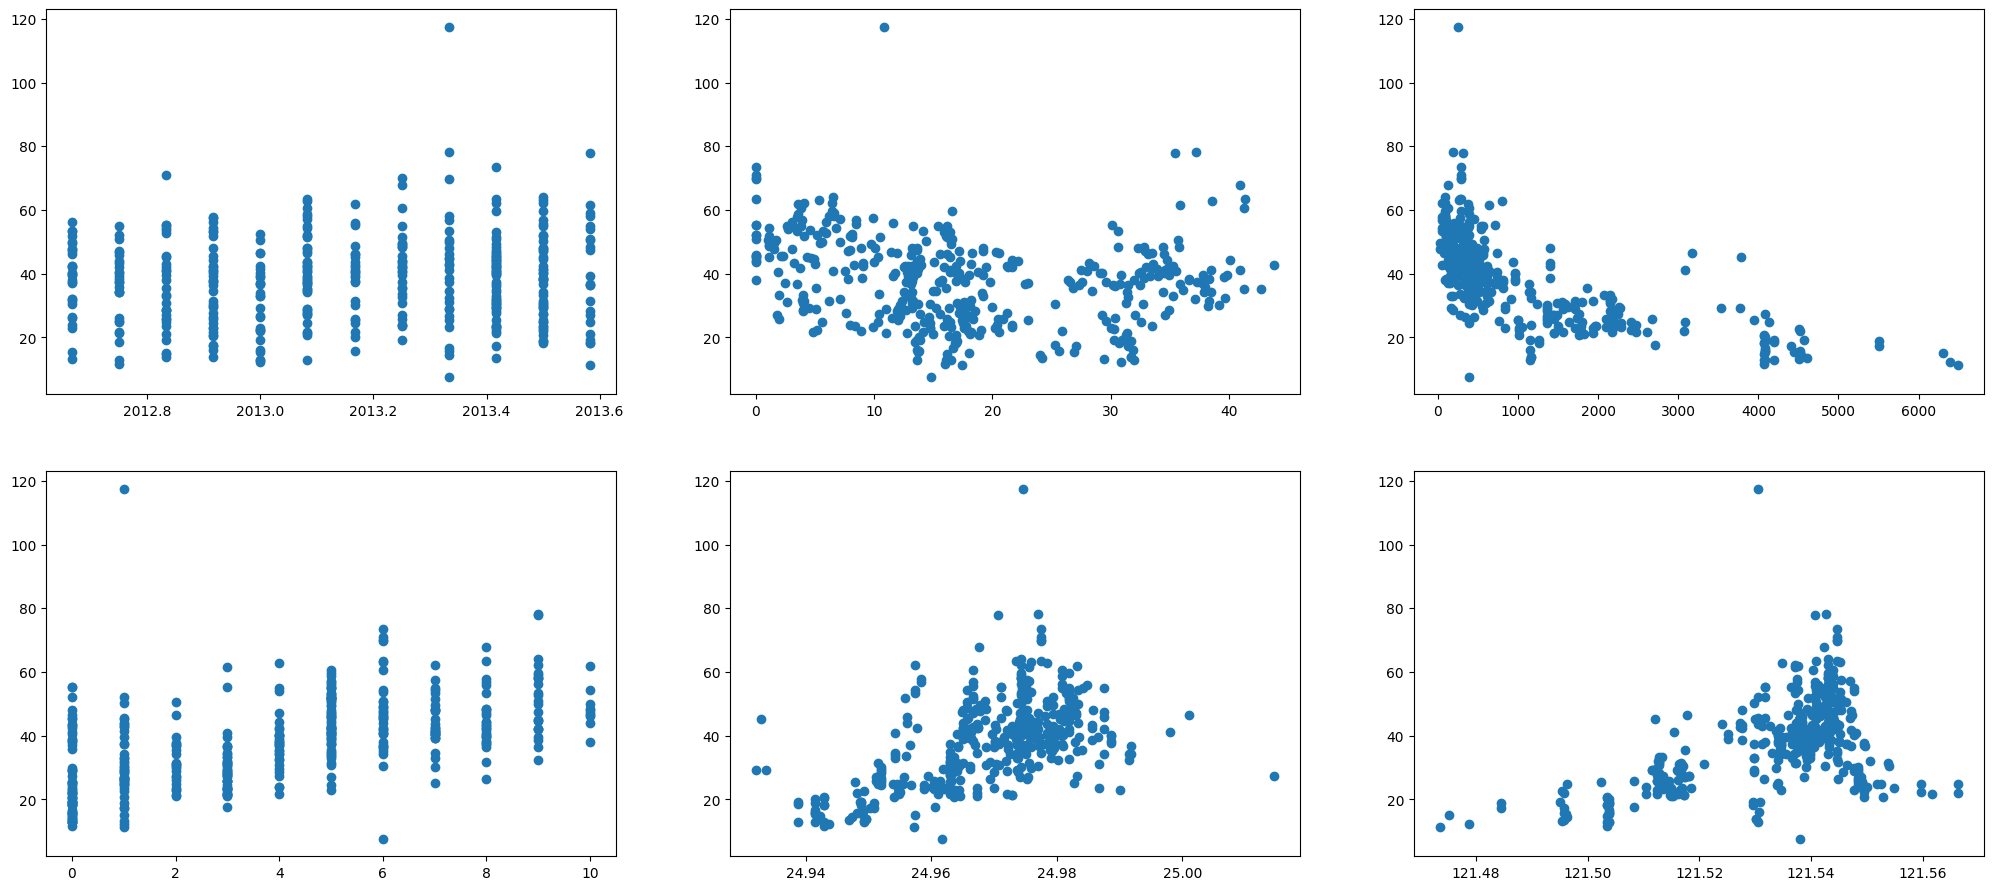

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("Real estate.csv")
df.isna().sum()

X=df.iloc[:,1:7]
column_names = df.columns[1:8]
y = df.iloc[:,7:8]
fig,axs = plt.subplots(2,3,figsize=(25,11))
X=X.to_numpy()
y=y.to_numpy()
for i in range(6):
    plt.subplot(2,3,1+i)
    plt.scatter(X[:,i],y)
    #plt.set_xlabel(column_names[i])
    #plt.set_ylabel(column_names[6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

linear = LinearRegression(0.01,200)
lasso = LinearRegression(0.01,200,'L1',3)
ridge = LinearRegression(0.01,200,'L2',3)
#linaer regression model : 
print("for linear model :")
linear.fit(X_train,y_train)
yPred_linear = linear.predict(X_test)

#Lasso regression model : 
print("for lasso model :")
lasso.fit(X_train,y_train)
ypred_lasso = lasso.predict(X_test)

#Ridge regression model : 
print("for ridge model :")
ridge.fit(X_train, y_train)
yPred_ridge = ridge.predict(X_test)

# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [70]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
data =  load_breast_cancer()
X = data.data
y= data.target
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [98]:
def sigmoid(z):
   z = 1/(1+np.exp(-z)) 
   return z 

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias = np.random.randn(1,1)

        #Implement the GD algortihm
        for i in range(self.epochs):
            z =  np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = np.dot(X.T, y_pred - y)/n_samples
            db = np.sum(y_pred - y)/n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr *db

    def predict(self, X):
      #Write the predict function
        y_pred = np.dot(X,self.weights)+self.bias
        for i in range(X.shape[0]):
            if y_pred[i]>=0.5 : y_pred[i]=1
            else : y_pred[i] = 0
        return y_pred

In [118]:
lr = LogisticRegression(0.1,10000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.linear_model import LogisticRegression as LogR

#l1 = LogR(penalty = 'l1')
#l1.fit(X_train,y_train)
#y_pred_l1=l1.predict(X_test)

l2 = LogR(penalty = 'l2')
l2.fit(X_train,y_train)
y_pred_l2=l2.predict(X_test)

LR = LogR(penalty = None)
LR.fit(X_train,y_train)
y_pred_LR=LR.predict(X_test)

from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_test,y_pred )
l2_acc = accuracy_score(y_test,y_pred_l2)

LR_acc = accuracy_score(y_test,y_pred_LR)
print("Accuracy score for mymodel :", lr_acc)
print("Accuracy score for sklearn model with penalty = L2 :", l2_acc)
print("Accuracy score for sklearn model with penalty = None :", LR_acc)

Accuracy score for mymodel : 0.9707602339181286
Accuracy score for sklearn model with penalty = L2 : 0.9532163742690059
Accuracy score for sklearn model with penalty = None : 0.9532163742690059


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [121]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 62   2]
 [  3 104]]


# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [275]:
df = pd.read_csv("glass.csv")
X = df.iloc[:,0:9]
y = df.iloc[:,9:10]
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [276]:
from collections import Counter

def EuclidDist(x,y) : 
    return np.sqrt(np.sum((x-y)**2))

class KNN(object): 
    def __init__(self,k):
        self.k=k
    def fit(self, X,y):
        self.x_train = X
        self.y_train = y
    def predict(self, X_test):
        predValue = [self.helper(i) for i in X_test]
        return np.array(predValue)
    def helper(self, x):
        distances = [EuclidDist(x,t) for t in self.x_train]
        indices = np.argsort(distances)[:self.k]
        labels = [tuple(self.y_train[z]) for z in indices]
        cnt= Counter(labels).most_common()
        return cnt[0][0]
    
knn = KNN(2)
knn.fit(X_train, y_train)


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [277]:
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy score of my model : ",accuracy_score(y_pred,y_test))

from sklearn.neighbors import KNeighborsClassifier 
knc = KNeighborsClassifier(n_neighbors=2)
y_train = np.reshape(y_train,(171,))
knc.fit(X_train,y_train)
y_pred_knc = knc.predict(X_test)
y_pred= np.reshape(y_pred,(43,1))
print("accuracy score of knc model : ",accuracy_score(y_pred_knc,y_test))


accuracy score of my model :  0.7209302325581395
accuracy score of knc model :  0.7209302325581395


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

0.6744186046511628


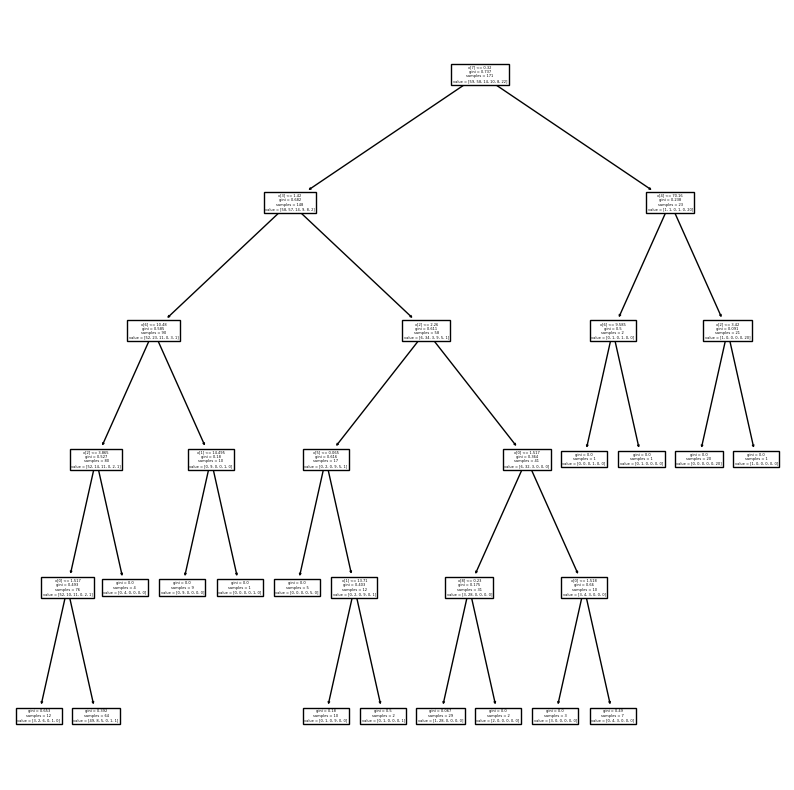

0.6511627906976745


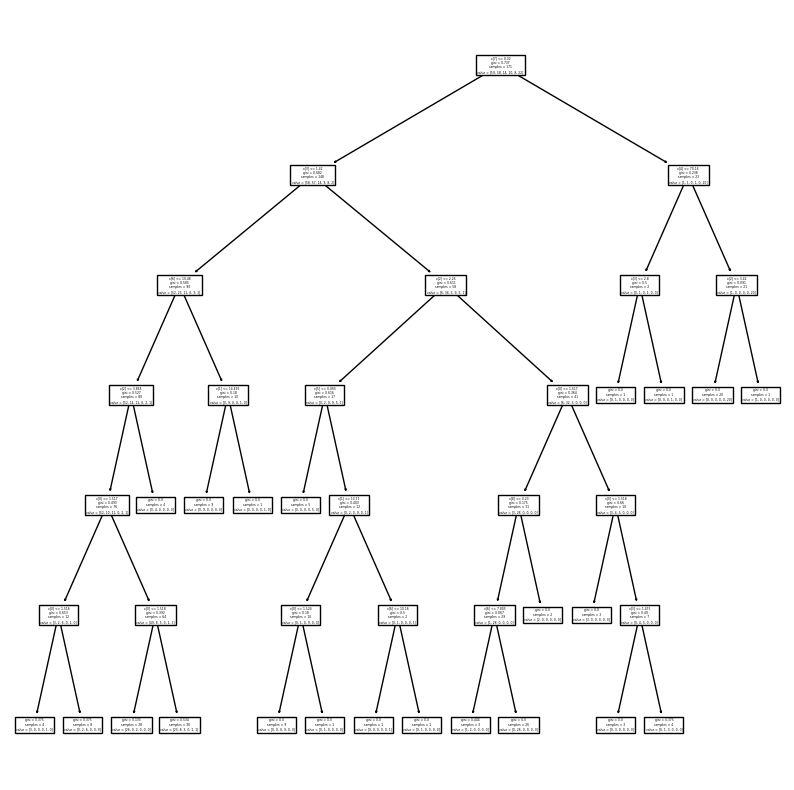

0.6046511627906976


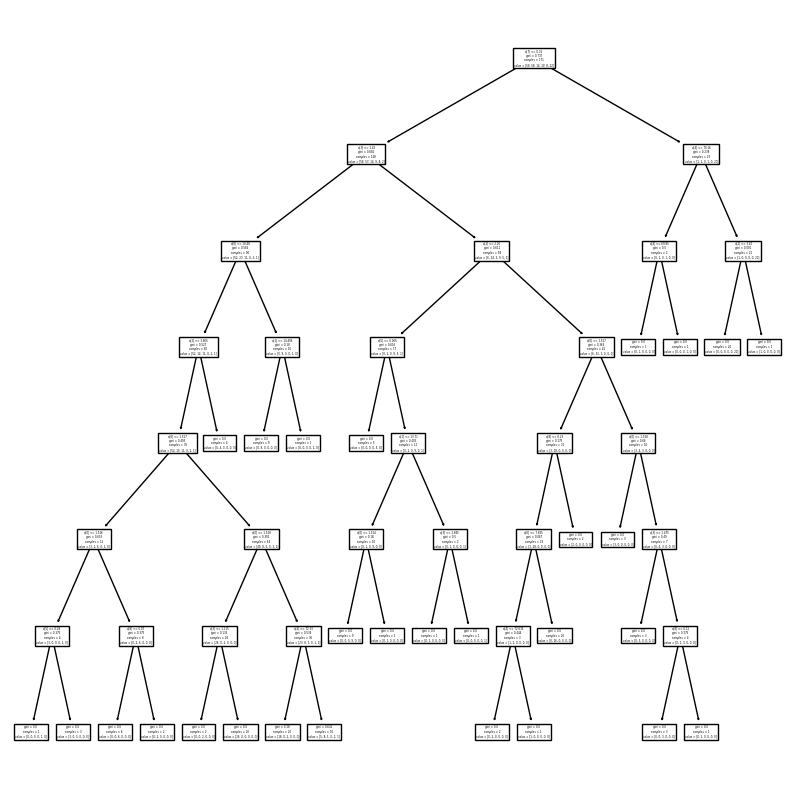

0.627906976744186


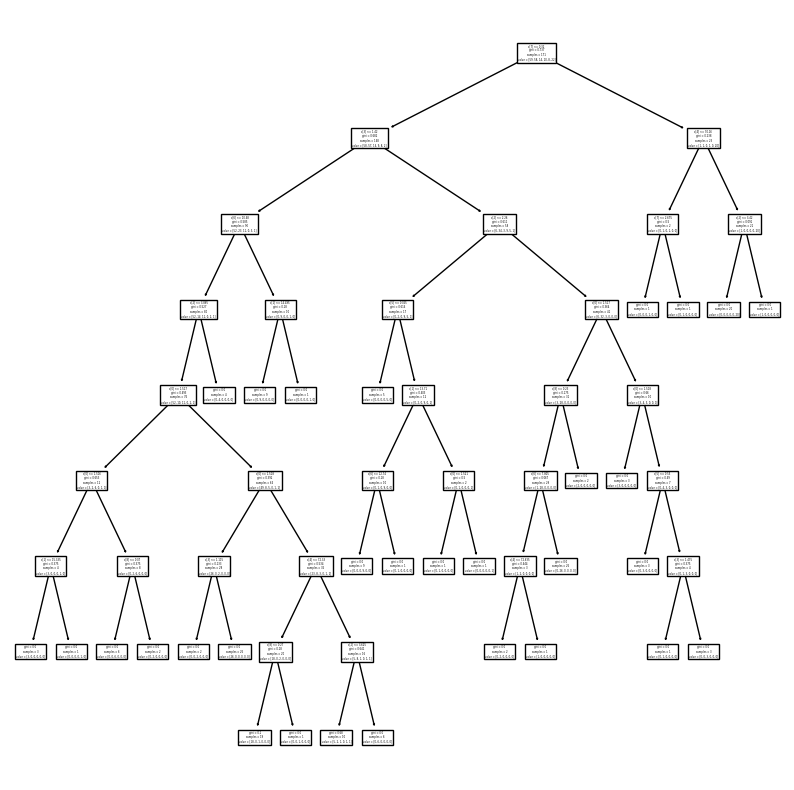

0.6511627906976745


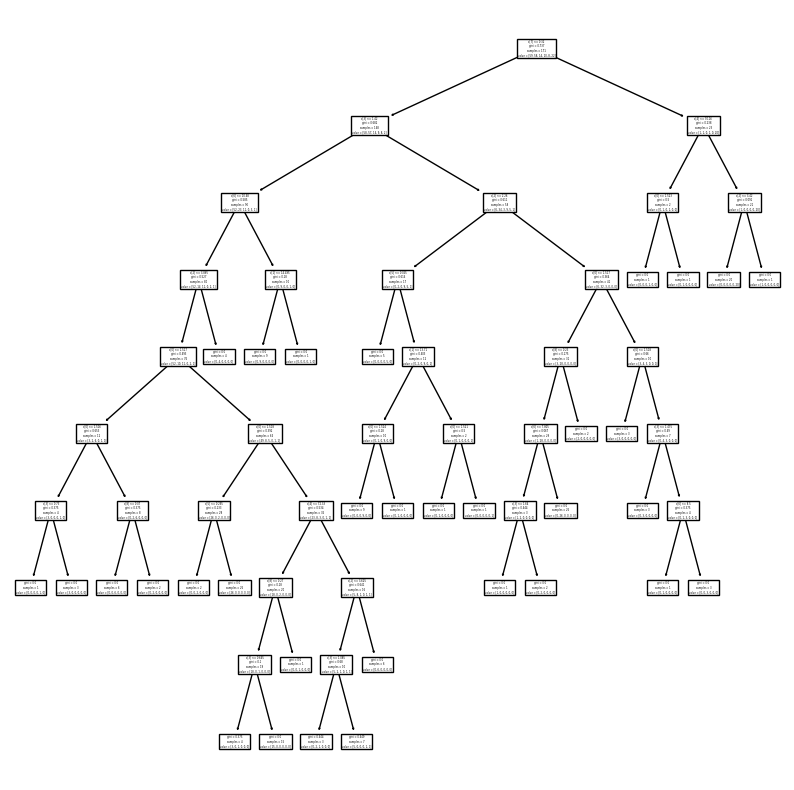

0.6046511627906976


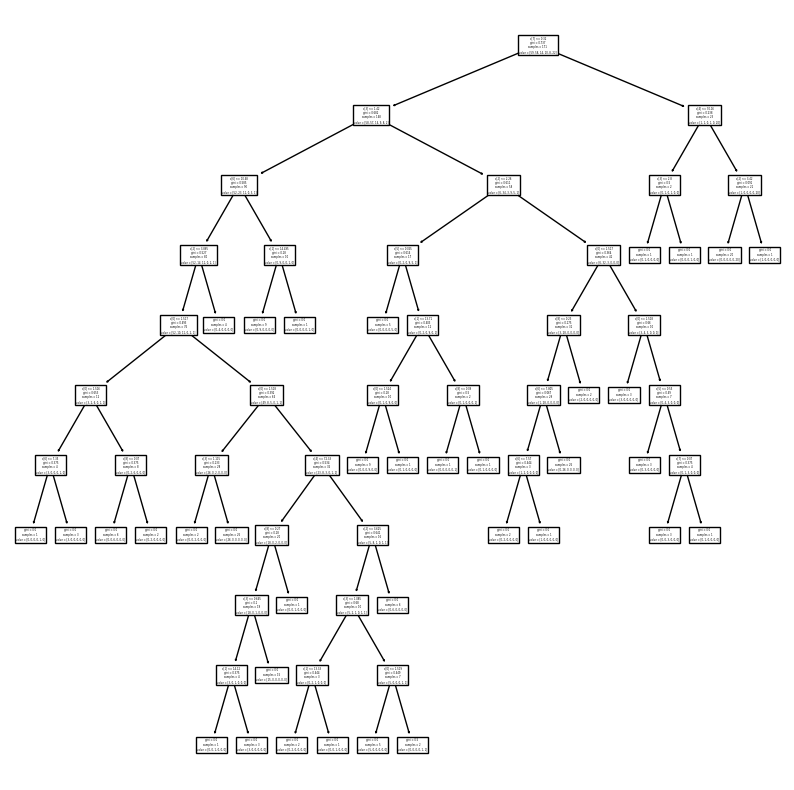

In [281]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

for i in range(5,11):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_test)
    print(accuracy_score(y_pred,y_test))
    
    plt.figure(figsize=(10,10))
    plot_tree(decision_tree=dtc,max_depth=i)
    plt.show()